Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

DATA LOADING

In [2]:
# Load dataset from UCI
url = 'https://archive.ics.uci.edu/static/public/891/data.csv'
df = pd.read_csv(url)

print("Data successfully loaded!")
print(f"Dataset shape: {df.shape}")
print(df.head())

Data successfully loaded!
Dataset shape: (253680, 23)
   ID  Diabetes_binary  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0   0                0       1         1          1   40       1       0   
1   1                0       0         0          0   25       1       0   
2   2                0       1         1          1   28       0       0   
3   3                0       1         0          1   27       0       0   
4   4                0       1         1          1   24       0       0   

   HeartDiseaseorAttack  PhysActivity  ...  AnyHealthcare  NoDocbcCost  \
0                     0             0  ...              1            0   
1                     0             1  ...              0            1   
2                     0             0  ...              1            1   
3                     0             1  ...              1            0   
4                     0             1  ...              1            0   

   GenHlth  MentHlth  PhysHlth  DiffWalk  Se

# **DATA PREPROCESSING**

In [3]:

# STEP 1: Split Data
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}\n")

#  STEP 2: Check and Remove Duplicates

## Check for duplicate rows in the training set
print(f"Duplicate rows in training set: {X_train.duplicated().sum()}")
X_train = X_train.drop_duplicates()

## Check for duplicate rows in the test set
print(f"Duplicate rows in test set: {X_test.duplicated().sum()}")
X_test = X_test.drop_duplicates()

print(f"Training set shape after removing duplicates: {X_train.shape}")
print(f"Testing set shape after removing duplicates: {X_test.shape}\n")

# STEP 3: Preprocessing on Training Data

## Handle Missing Values in Training Set
train_threshold = 0.1 * len(X_train)  # 10% of training data size
missing_train = X_train.isnull().sum()

# Drop columns with too many missing values in the training set
X_train = X_train.drop(columns=missing_train[missing_train > train_threshold].index)

# Impute missing values in the training set
for column in X_train.columns:
    if X_train[column].dtype == 'object':  # Categorical
        X_train[column].fillna(X_train[column].mode()[0], inplace=True)
    else:  # Continuous
        X_train[column].fillna(X_train[column].median(), inplace=True)

print("Missing values in training set after imputation:\n", X_train.isnull().sum())

# Preprocessing on Test Data

## Handle Missing Values in Test Set (based only on test set statistics)
test_threshold = 0.1 * len(X_test)  # 10% of test data size
missing_test = X_test.isnull().sum()

# Drop columns with too many missing values in the test set
X_test = X_test.drop(columns=missing_test[missing_test > test_threshold].index)

# Impute missing values in the test set
for column in X_test.columns:
    if X_test[column].dtype == 'object':  # Categorical
        X_test[column].fillna(X_test[column].mode()[0], inplace=True)
    else:  # Continuous
        X_test[column].fillna(X_test[column].median(), inplace=True)

print("Missing values in test set after imputation:\n", X_test.isnull().sum())

# STEP 4: Encoding Categorical Variables
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns in both training and testing sets (if needed)
X_train, X_test = X_train.align(X_test, join='inner', axis=1)
print("1")
# STEP 5: Feature Scaling
continuous_features = ['BMI', 'Age']  # Example continuous features

scaler = StandardScaler()
X_train[continuous_features] = scaler.fit_transform(X_train[continuous_features])
X_test[continuous_features] = scaler.transform(X_test[continuous_features])
print("2")
# STEP 6: Balance the Training Set Using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Resampled training set shape: {X_train_resampled.shape}, {y_train_resampled.shape}\n")

# STEP 7: Display Final Dataset Shapes
print(f"Final Training set shape: {X_train_resampled.shape}, {y_train_resampled.shape}")
print(f"Final Testing set shape: {X_test.shape}, {y_test.shape}")


Training set shape: (177576, 22), (177576,)
Testing set shape: (76104, 22), (76104,)

Duplicate rows in training set: 0
Duplicate rows in test set: 0
Training set shape after removing duplicates: (177576, 22)
Testing set shape after removing duplicates: (76104, 22)



<ipython-input-3-53e53593de0c>:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[column].fillna(X_train[column].median(), inplace=True)
<ipython-input-3-53e53593de0c>:56: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

Missing values in training set after imputation:
 ID                      0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
Missing values in test set after imputation:
 ID                      0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHeal

PREPROCESSING RESULTS

<Figure size 1200x600 with 0 Axes>

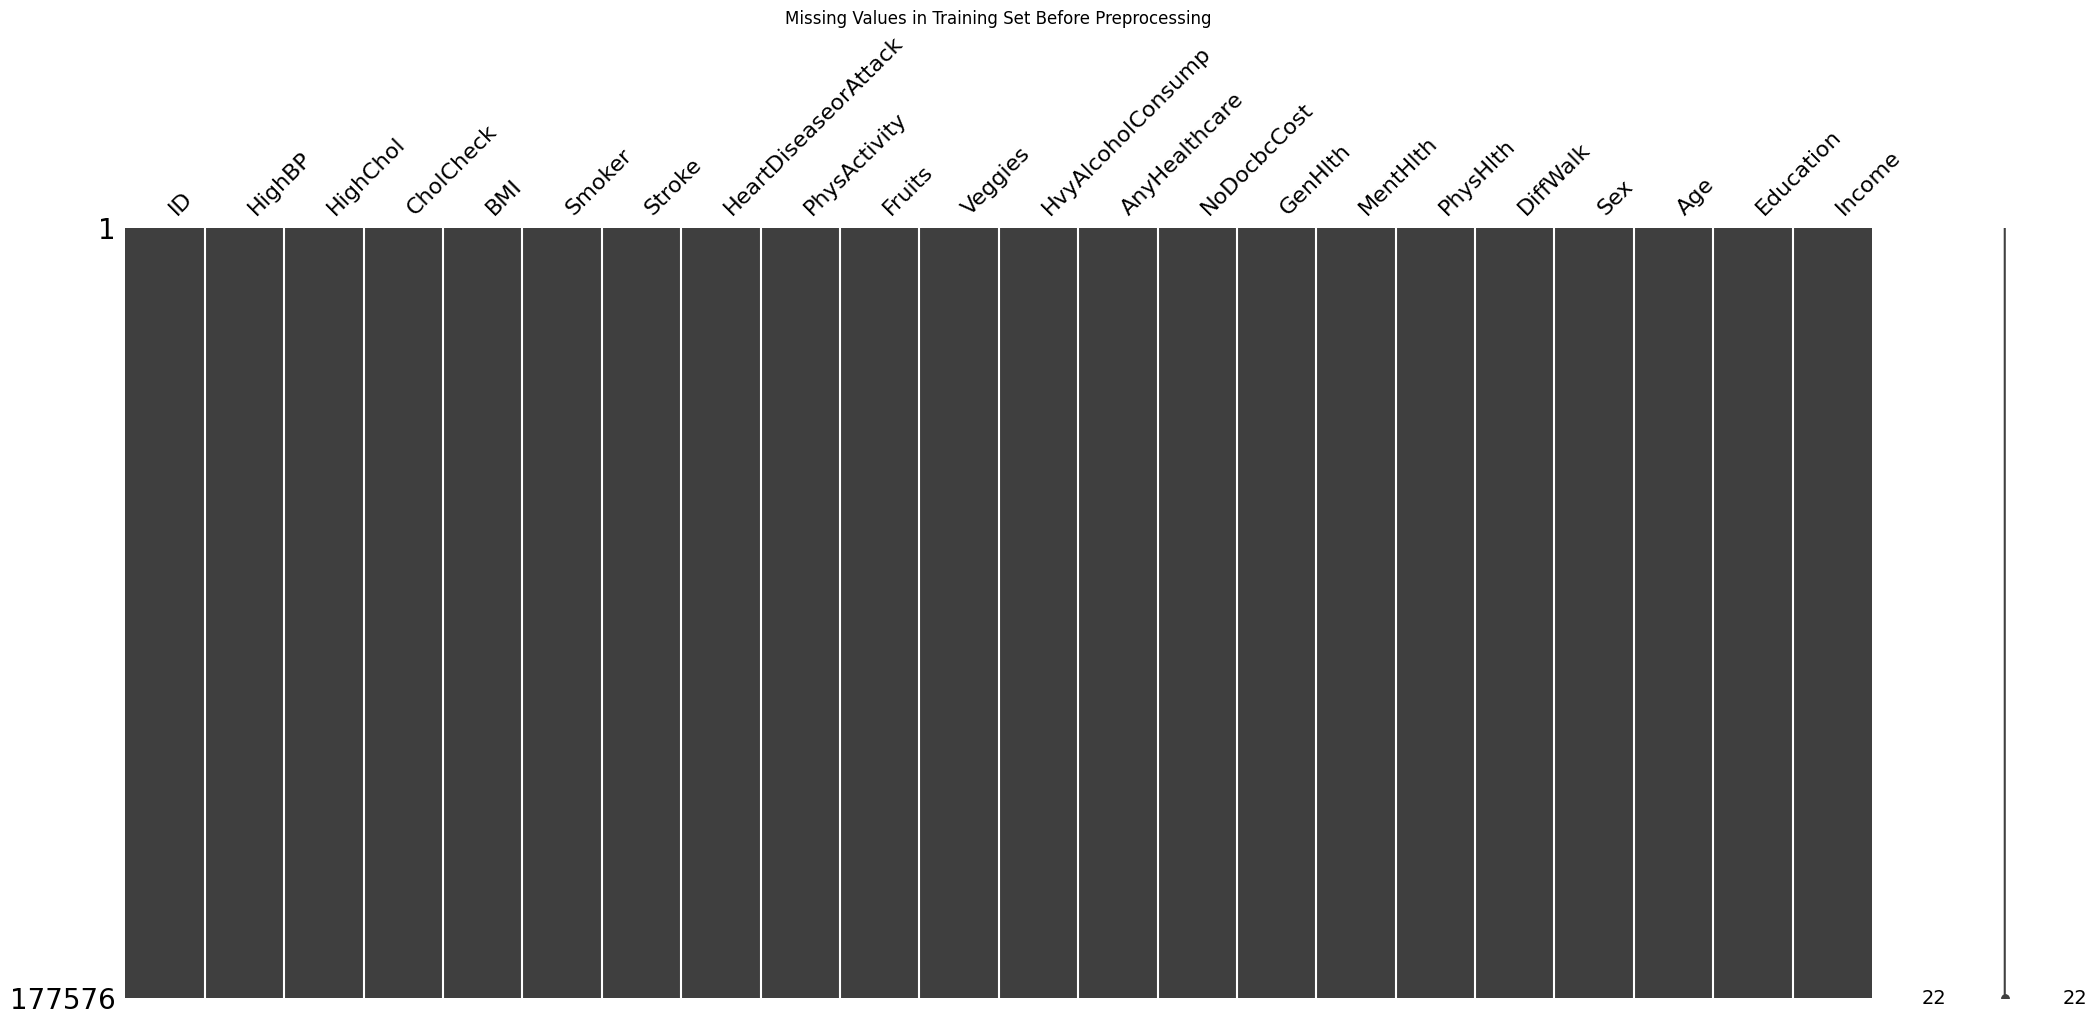

<Figure size 1200x600 with 0 Axes>

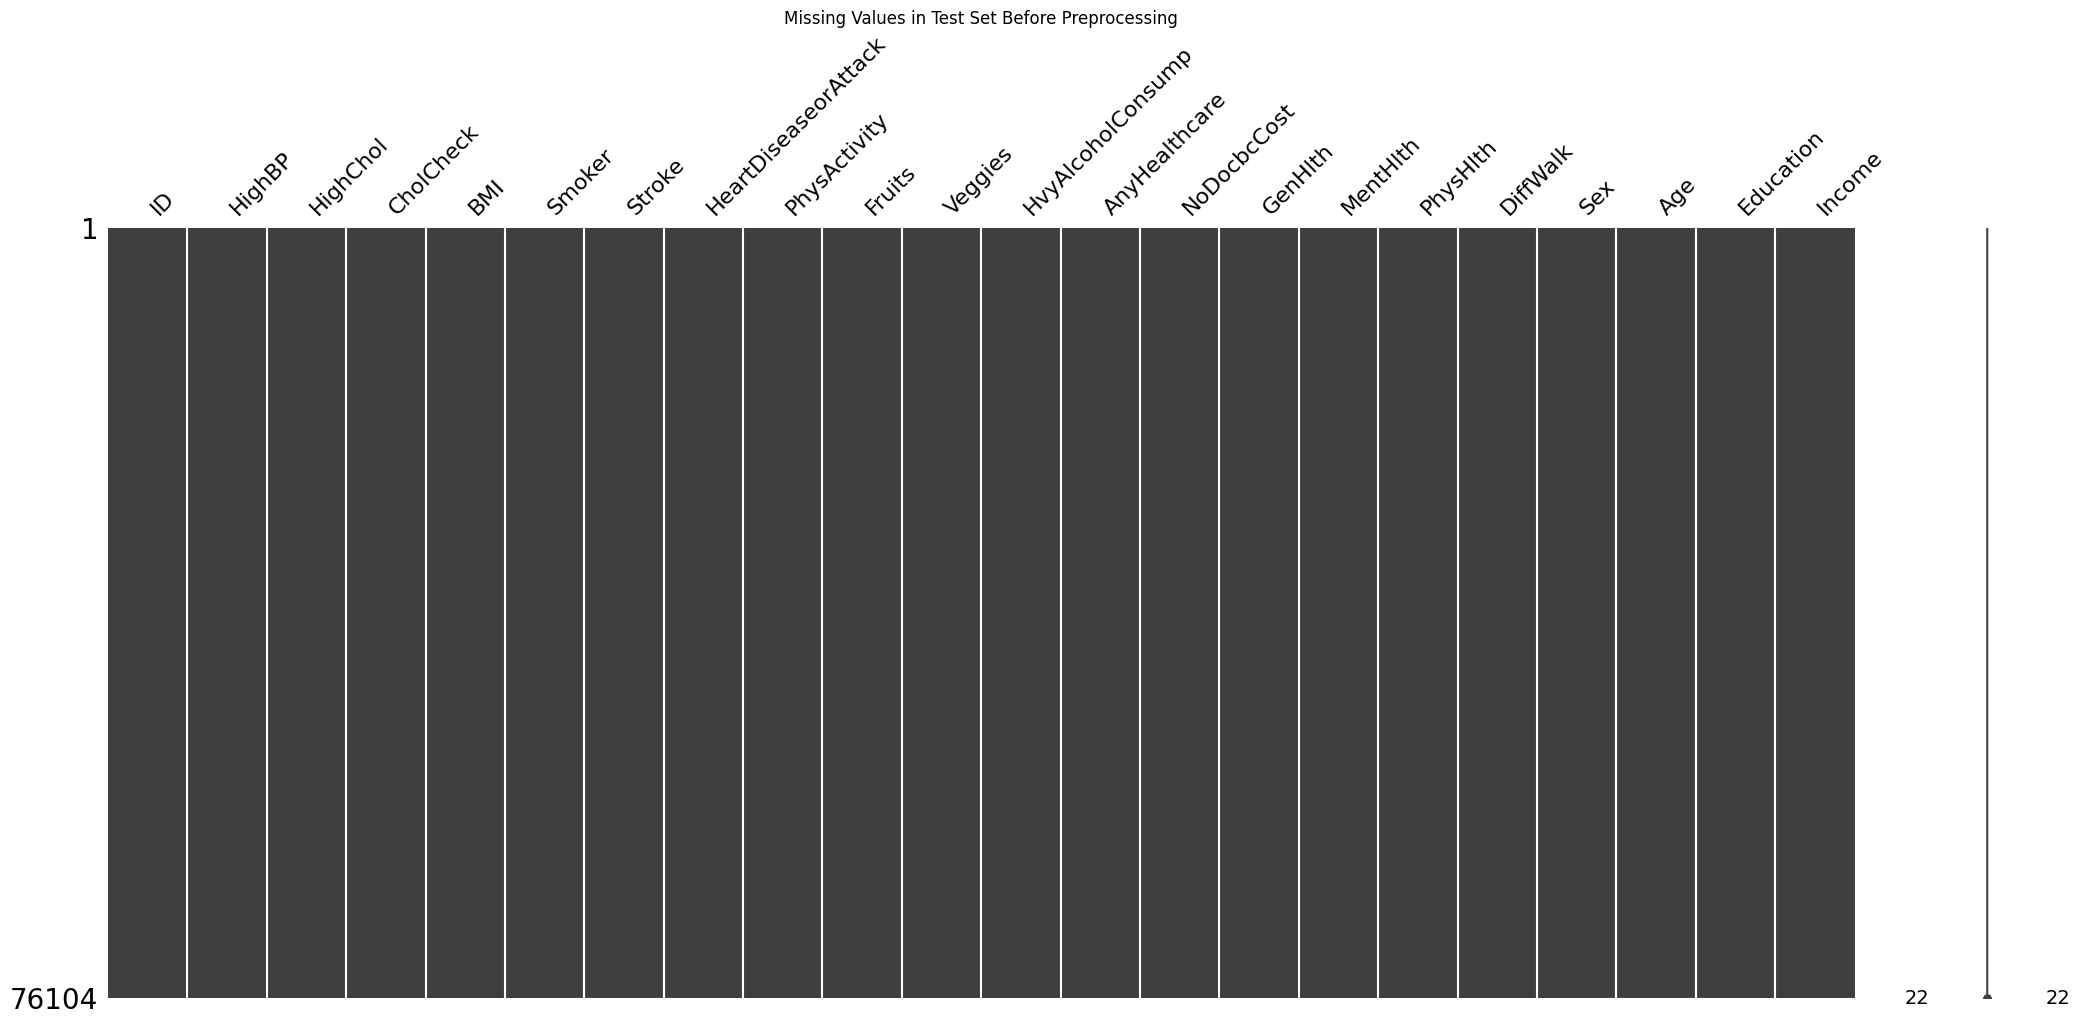

<ipython-input-4-40af285f4cab>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='viridis')


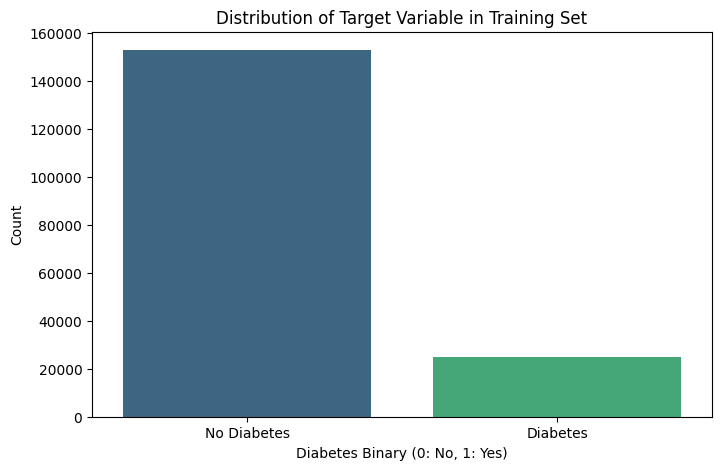

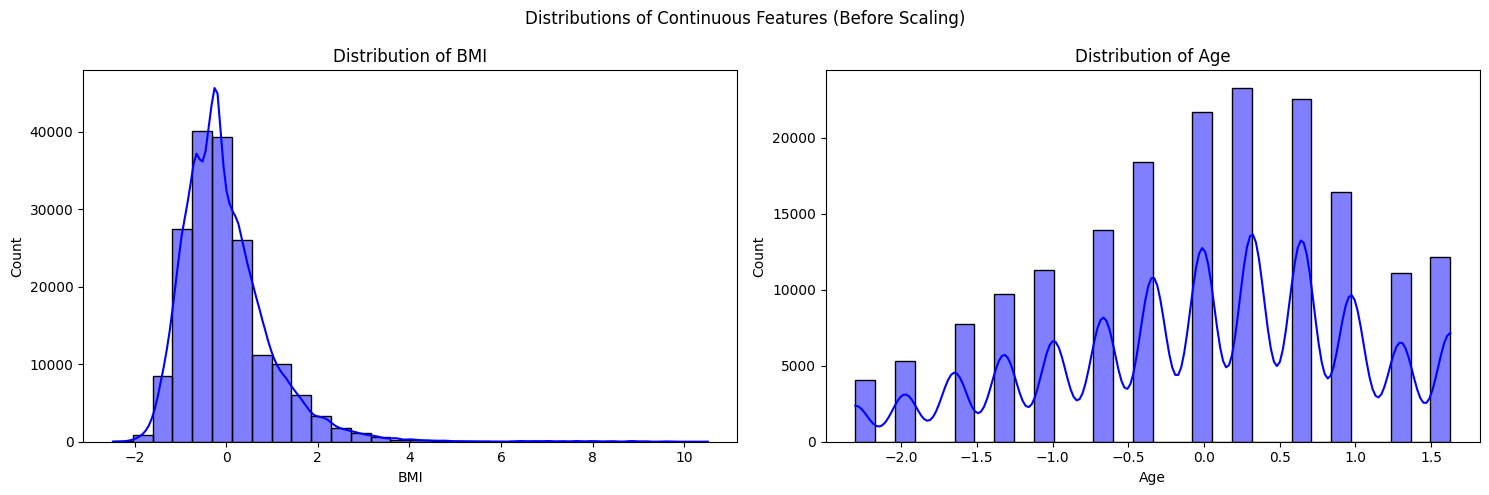

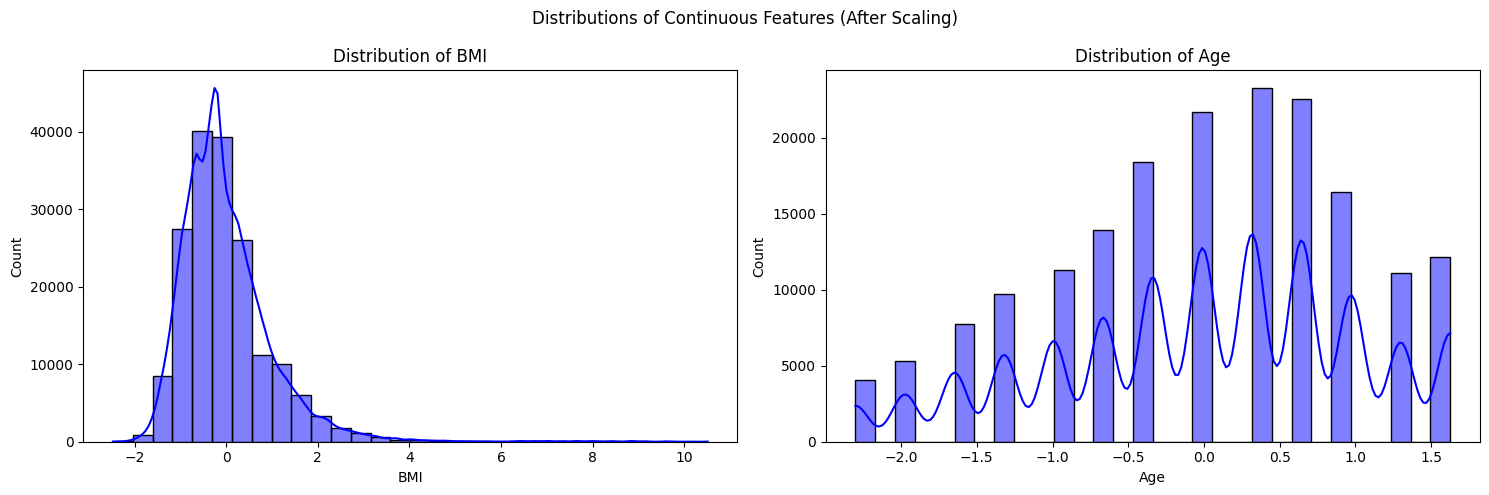

<ipython-input-4-40af285f4cab>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_resampled, palette='viridis')


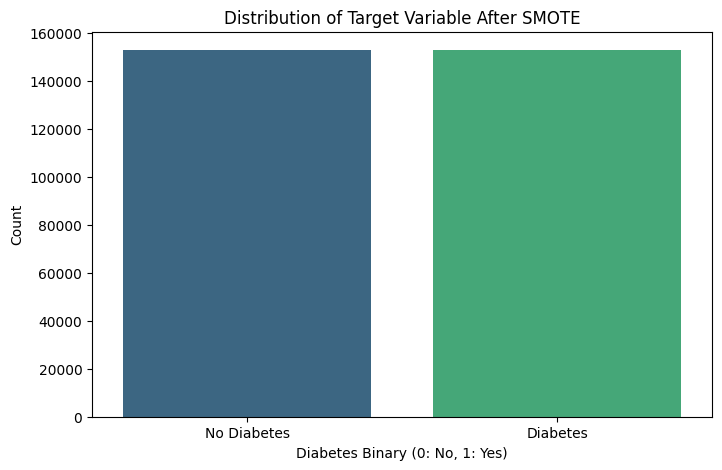

In [4]:
# STEP 1: Visualize Missing Values
import missingno as msno

# Visualize missing values in training set before preprocessing
plt.figure(figsize=(12, 6))
msno.matrix(X_train)
plt.title('Missing Values in Training Set Before Preprocessing')
plt.show()

# Visualize missing values in test set before preprocessing
plt.figure(figsize=(12, 6))
msno.matrix(X_test)
plt.title('Missing Values in Test Set Before Preprocessing')
plt.show()

# STEP 2: Plot the Distribution of the Target Variable
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train, palette='viridis')
plt.title('Distribution of Target Variable in Training Set')
plt.xlabel('Diabetes Binary (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()

# STEP 3: Plot Feature Distributions Before and After Scaling
# Create a function to plot the distributions
def plot_feature_distribution(df, title, feature_list):
    plt.figure(figsize=(15, 5))
    for i, feature in enumerate(feature_list):
        plt.subplot(1, len(feature_list), i + 1)
        sns.histplot(df[feature], kde=True, color='blue', bins=30)
        plt.title(f'Distribution of {feature}')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Plot distributions before scaling
plot_feature_distribution(X_train[continuous_features], 'Distributions of Continuous Features (Before Scaling)', continuous_features)

# STEP 4: Plot Feature Distributions After Scaling
# Rescale the training set features to visualize changes
X_train_scaled = scaler.fit_transform(X_train[continuous_features])

# Create a DataFrame for scaled features
scaled_df = pd.DataFrame(X_train_scaled, columns=continuous_features)

# Plot distributions after scaling
plot_feature_distribution(scaled_df, 'Distributions of Continuous Features (After Scaling)', continuous_features)

# STEP 5: Visualize Class Distribution After SMOTE
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train_resampled, palette='viridis')
plt.title('Distribution of Target Variable After SMOTE')
plt.xlabel('Diabetes Binary (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()


# Descriptive Statistics

In [5]:
# Descriptive Statistics
print("Descriptive Statistics for Training Set:")
print(X_train.describe())
print("\nDescriptive Statistics for Testing Set:")
print(X_test.describe())


Descriptive Statistics for Training Set:
                  ID         HighBP       HighChol      CholCheck  \
count  177576.000000  177576.000000  177576.000000  177576.000000   
mean   126705.301167       0.428515       0.423407       0.962574   
std     73221.139342       0.494865       0.494100       0.189804   
min         0.000000       0.000000       0.000000       0.000000   
25%     63298.500000       0.000000       0.000000       1.000000   
50%    126621.500000       0.000000       0.000000       1.000000   
75%    190136.250000       1.000000       1.000000       1.000000   
max    253678.000000       1.000000       1.000000       1.000000   

                BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  1.775760e+05  177576.000000  177576.000000         177576.000000   
mean   1.222811e-16       0.443298       0.040518              0.094585   
std    1.000003e+00       0.496776       0.197171              0.292641   
min   -2.473995e+00       0.000000   

CORRELATION MATRIX

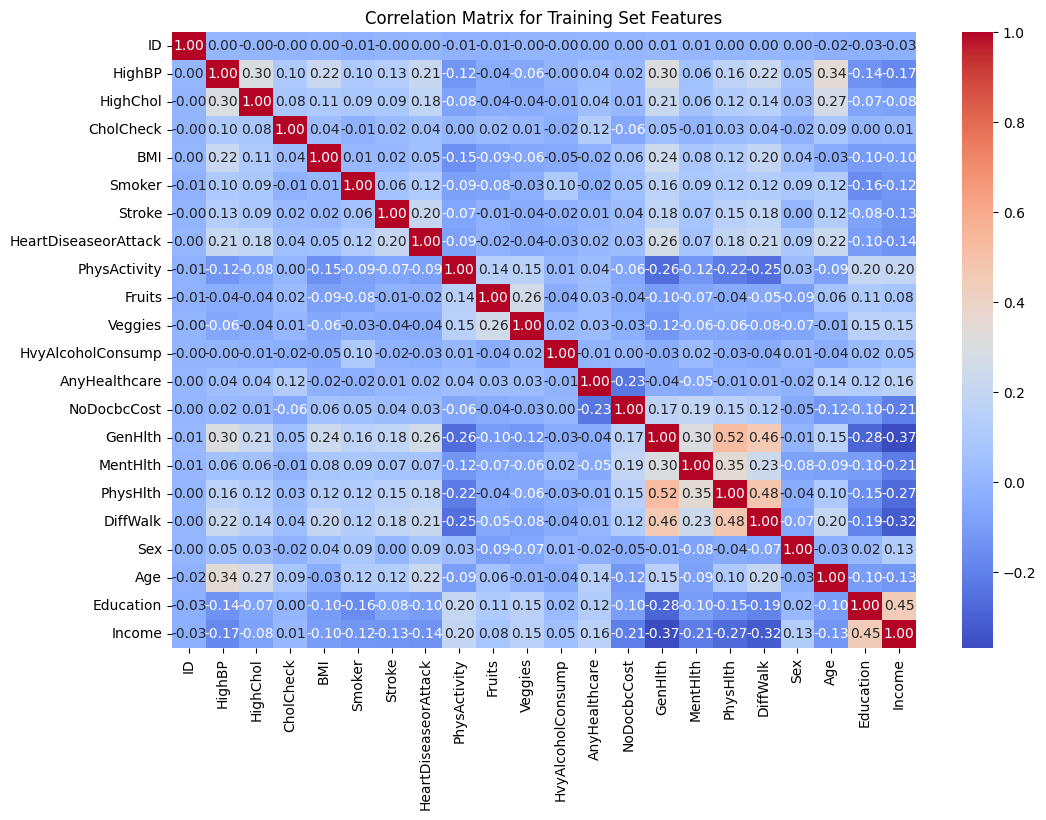

In [6]:
plt.figure(figsize=(12, 8))
correlation_matrix = X_train.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix for Training Set Features')
plt.show()

Class Imbalance Check Before and After SMOTE

In [7]:
# Class Imbalance Before and After SMOTE
print("Class distribution before SMOTE:")
print(y_train.value_counts())
print("\nClass distribution after SMOTE:")
print(y_train_resampled.value_counts())


Class distribution before SMOTE:
Diabetes_binary
0    152729
1     24847
Name: count, dtype: int64

Class distribution after SMOTE:
Diabetes_binary
1    152729
0    152729
Name: count, dtype: int64


Data Types and Unique Values

In [8]:
# Data Types and Unique Values
print("Data Types and Unique Values:")
print(X_train.dtypes)
print("\nUnique Values in Each Column:")
for column in X_train.columns:
    print(f"{column}: {X_train[column].nunique()}")


Data Types and Unique Values:
ID                        int64
HighBP                    int64
HighChol                  int64
CholCheck                 int64
BMI                     float64
Smoker                    int64
Stroke                    int64
HeartDiseaseorAttack      int64
PhysActivity              int64
Fruits                    int64
Veggies                   int64
HvyAlcoholConsump         int64
AnyHealthcare             int64
NoDocbcCost               int64
GenHlth                   int64
MentHlth                  int64
PhysHlth                  int64
DiffWalk                  int64
Sex                       int64
Age                     float64
Education                 int64
Income                    int64
dtype: object

Unique Values in Each Column:
ID: 177576
HighBP: 2
HighChol: 2
CholCheck: 2
BMI: 81
Smoker: 2
Stroke: 2
HeartDiseaseorAttack: 2
PhysActivity: 2
Fruits: 2
Veggies: 2
HvyAlcoholConsump: 2
AnyHealthcare: 2
NoDocbcCost: 2
GenHlth: 5
MentHlth: 31
PhysHlth:

Visualizing the Preprocessed Data

In [9]:
# Display Sample of Preprocessed Data
print("Sample of Preprocessed Training Data:")
print(X_train_resampled.head())


Sample of Preprocessed Training Data:
       ID  HighBP  HighChol  CholCheck       BMI  Smoker  Stroke  \
0   51457       1         1          1  0.999957       0       0   
1  104586       1         1          1  1.302039       1       0   
2  135715       0         0          1 -0.057333       0       0   
3  229271       0         0          1 -0.812540       0       0   
4  107891       0         0          1  0.244750       1       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                     0             1       1  ...              1   
1                     0             1       1  ...              1   
2                     0             1       1  ...              1   
3                     0             1       1  ...              1   
4                     0             1       0  ...              1   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex       Age  \
0            0        5         0        14         1    0  1.2999

# **Feature Selection**

Logistic Regression Feature Importance

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-10-0e796e130c17>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')


Feature Importance (Logistic Regression):
                 Feature    Importance
9                 Fruits  8.924373e-01
17              DiffWalk  8.644227e-01
5                 Smoker  8.547348e-01
8           PhysActivity  7.856772e-01
19                   Age  7.133237e-01
3              CholCheck  6.593484e-01
4                    BMI  6.443970e-01
13           NoDocbcCost  5.846727e-01
14               GenHlth  5.693682e-01
10               Veggies  5.411165e-01
18                   Sex  5.236291e-01
11     HvyAlcoholConsump  4.493911e-01
7   HeartDiseaseorAttack  3.652610e-01
6                 Stroke  2.860805e-01
1                 HighBP  2.513345e-01
12         AnyHealthcare  1.309996e-01
20             Education  1.252704e-01
21                Income  1.060410e-01
15              MentHlth  1.698935e-02
2               HighChol  7.313141e-03
16              PhysHlth  4.412687e-03
0                     ID  3.431440e-07


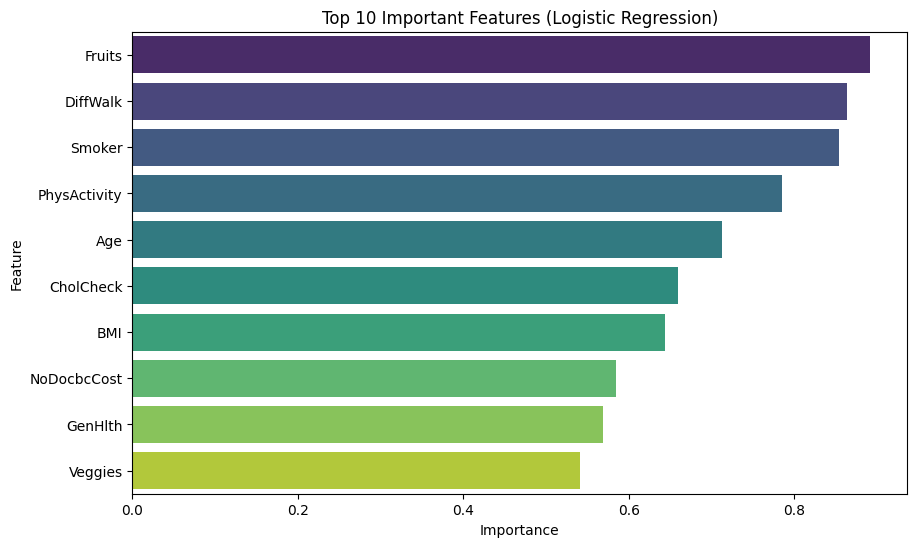

In [10]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Train Logistic Regression on the full resampled training set
model = LogisticRegression(max_iter=500, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Get feature importance (absolute value of coefficients)
feature_importance = np.abs(model.coef_[0])
feature_names = X_train_resampled.columns

# Combine feature names and their importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print("Feature Importance (Logistic Regression):")
print(feature_importance_df)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Important Features (Logistic Regression)')
plt.show()


Random Forest Feature Importance

Feature Importance (Random Forest):
                 Feature  Importance
4                    BMI    0.203835
19                   Age    0.185974
0                     ID    0.100410
21                Income    0.097999
20             Education    0.068217
16              PhysHlth    0.049308
14               GenHlth    0.048867
8           PhysActivity    0.044935
15              MentHlth    0.032424
9                 Fruits    0.024899
5                 Smoker    0.021809
10               Veggies    0.018110
1                 HighBP    0.016676
18                   Sex    0.015767
2               HighChol    0.014589
13           NoDocbcCost    0.012740
17              DiffWalk    0.010713
11     HvyAlcoholConsump    0.010215
7   HeartDiseaseorAttack    0.008314
6                 Stroke    0.005561
12         AnyHealthcare    0.005157
3              CholCheck    0.003479


<ipython-input-11-5b234bbeaf0a>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=rf_feature_importance_df.head(10), palette='viridis')


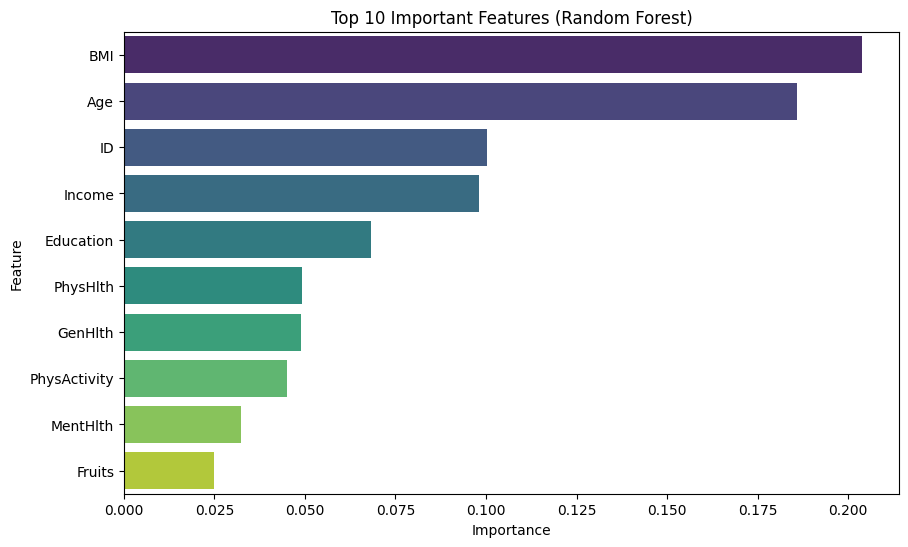

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Get feature importance
feature_importance = rf_model.feature_importances_
feature_names = X_train_resampled.columns

# Combine feature names and their importance
rf_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print("Feature Importance (Random Forest):")
print(rf_feature_importance_df)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Important Features (Random Forest)')
plt.show()


Recursive Feature Elimination

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Selected Features by RFE (Top Features):
              Feature  Ranking  Selected
8        PhysActivity        1      True
13        NoDocbcCost        1      True
3           CholCheck        1      True
11  HvyAlcoholConsump        1      True
9              Fruits        1      True

Feature Rankings (All Features):
                 Feature  Ranking  Selected
8           PhysActivity        1      True
13           NoDocbcCost        1      True
3              CholCheck        1      True
11     HvyAlcoholConsump        1      True
9                 Fruits        1      True
12         AnyHealthcare        2     False
19                   Age        3     False
4                    BMI        4     False
5                 Smoker        5     False
10               Veggies        6     False
18                   Sex        7     False
6                 Stroke        8     False
17              DiffWalk        9     False
14               GenHlth       10     False
20             Educ

<ipython-input-12-aec4994c7b99>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ranking', y='Feature', data=feature_ranking_sorted, palette='viridis', order=feature_ranking_sorted['Feature'])


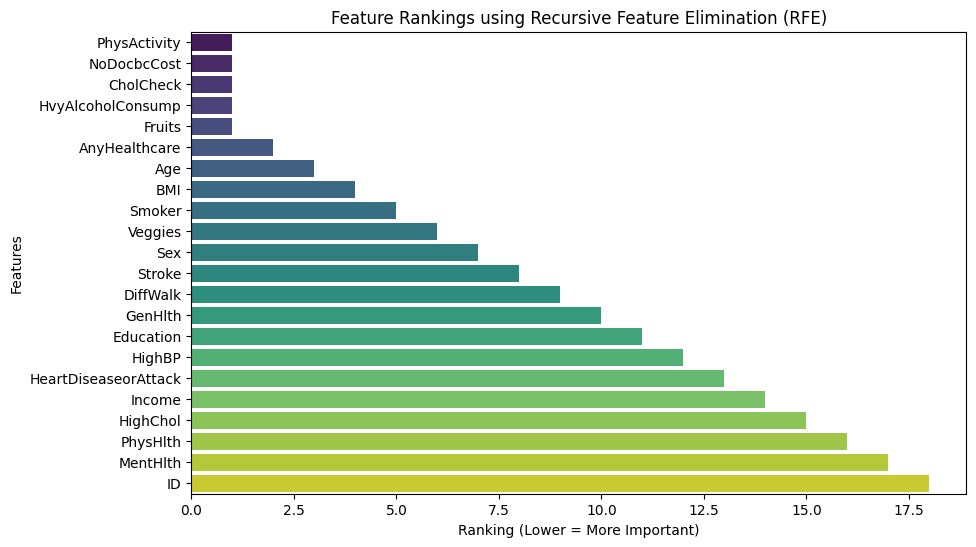


Final Selected Features:
Index(['CholCheck', 'PhysActivity', 'Fruits', 'HvyAlcoholConsump',
       'NoDocbcCost'],
      dtype='object')
New Training Set Shape: (305458, 5)
New Test Set Shape: (76104, 5)


In [12]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
model = LogisticRegression(max_iter=500, random_state=42)

# Use RFE for feature selection
rfe = RFE(estimator=model, n_features_to_select=5)  # Select top 5 features
rfe.fit(X_train_resampled, y_train_resampled)

# Get the ranking of features and selected features
feature_ranking = pd.DataFrame({
    'Feature': X_train_resampled.columns,
    'Ranking': rfe.ranking_,
    'Selected': rfe.support_
})

# Sort features by ranking
feature_ranking_sorted = feature_ranking.sort_values(by='Ranking')

# Display selected features and rankings
print("Selected Features by RFE (Top Features):")
print(feature_ranking_sorted[feature_ranking_sorted['Selected']])

print("\nFeature Rankings (All Features):")
print(feature_ranking_sorted)

# Visualize the feature rankings
plt.figure(figsize=(10, 6))
sns.barplot(x='Ranking', y='Feature', data=feature_ranking_sorted, palette='viridis', order=feature_ranking_sorted['Feature'])
plt.title('Feature Rankings using Recursive Feature Elimination (RFE)')
plt.xlabel('Ranking (Lower = More Important)')
plt.ylabel('Features')
plt.show()

# Extract the selected features for model training
selected_features = X_train_resampled.columns[rfe.support_]
X_train_selected = X_train_resampled[selected_features]
X_test_selected = X_test[selected_features]

print("\nFinal Selected Features:")
print(selected_features)

# Verify the new shape of the training and test sets
print(f"New Training Set Shape: {X_train_selected.shape}")
print(f"New Test Set Shape: {X_test_selected.shape}")


# Model Selection

1. Logistic Regression

Logistic Regression Accuracy: 0.5958293913591927


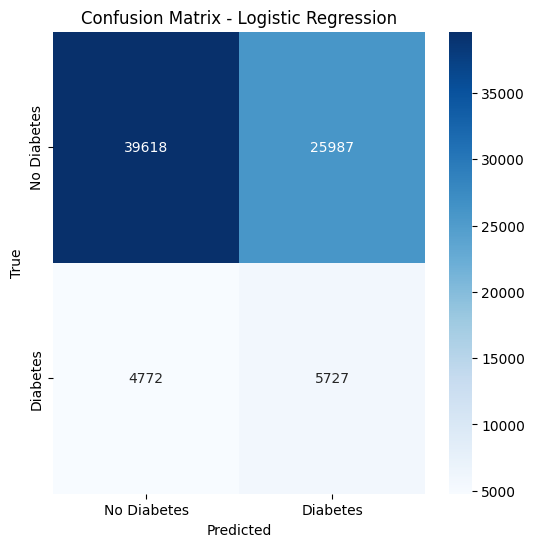

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting the top 5 features
X_train_selected = X_train_resampled[['PhysActivity', 'NoDocbcCost', 'CholCheck', 'HvyAlcoholConsump', 'Fruits']]
X_test_selected = X_test[['PhysActivity', 'NoDocbcCost', 'CholCheck', 'HvyAlcoholConsump', 'Fruits']]

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=500, random_state=42)

# Train the model
log_reg_model.fit(X_train_selected, y_train_resampled)

# Predictions
y_pred_log_reg = log_reg_model.predict(X_test_selected)

# Accuracy
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {log_reg_accuracy}")

# Confusion Matrix
log_reg_cm = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(6, 6))
sns.heatmap(log_reg_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


2. Random Forest Classifier

Random Forest Accuracy: 0.6027409860191317


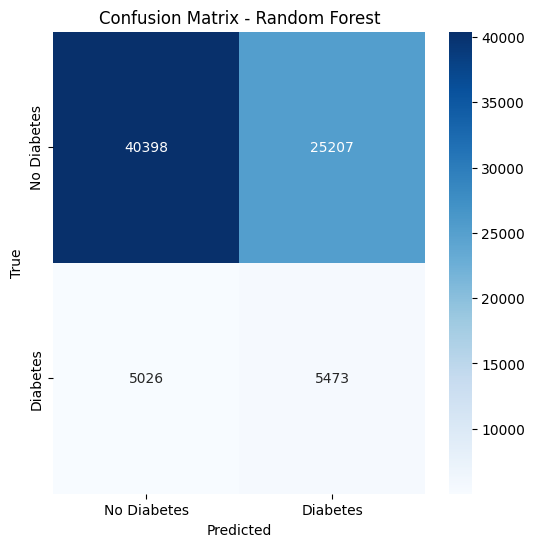

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_selected, y_train_resampled)

# Predictions
y_pred_rf = rf_model.predict(X_test_selected)

# Accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy}")

# Confusion Matrix
rf_cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


3. Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

# Initialize the Support Vector Machine model
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train_selected, y_train_resampled)

# Predictions
y_pred_svm = svm_model.predict(X_test_selected)

# Accuracy
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy}")

# Confusion Matrix
svm_cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title("Confusion Matrix - SVM")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


4. K-Nearest Neighbors (KNN)

KNN Accuracy: 0.8620440449910649


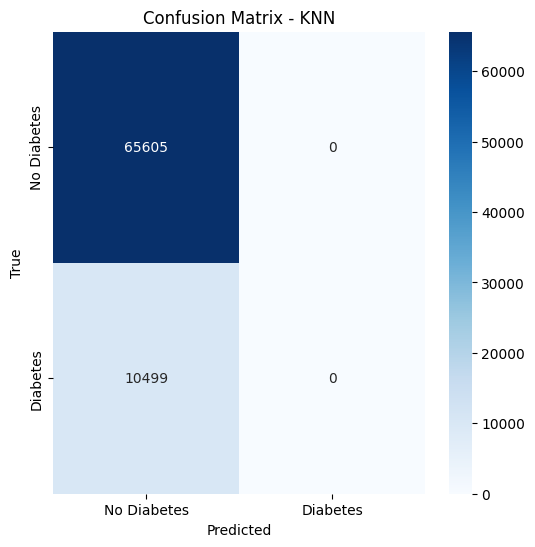

In [15]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train_selected, y_train_resampled)

# Predictions
y_pred_knn = knn_model.predict(X_test_selected)

# Accuracy
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {knn_accuracy}")

# Confusion Matrix
knn_cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 6))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title("Confusion Matrix - KNN")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


5. Decision Tree Classifier

Decision Tree Accuracy: 0.6027409860191317


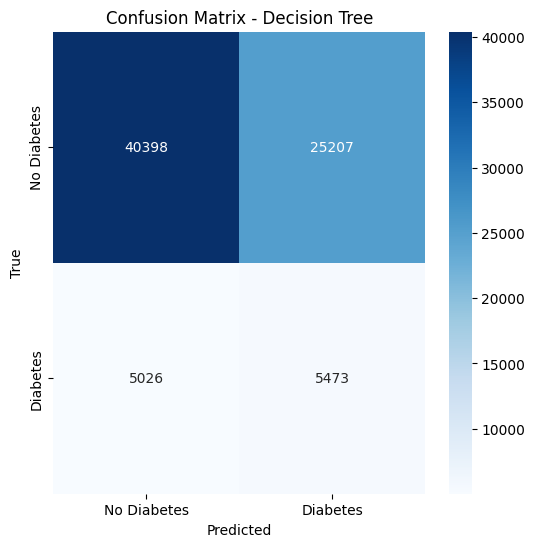

In [16]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train_selected, y_train_resampled)

# Predictions
y_pred_dt = dt_model.predict(X_test_selected)

# Accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy}")

# Confusion Matrix
dt_cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 6))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


6. Naive Bayes

Naive Bayes Accuracy: 0.26584673604541154


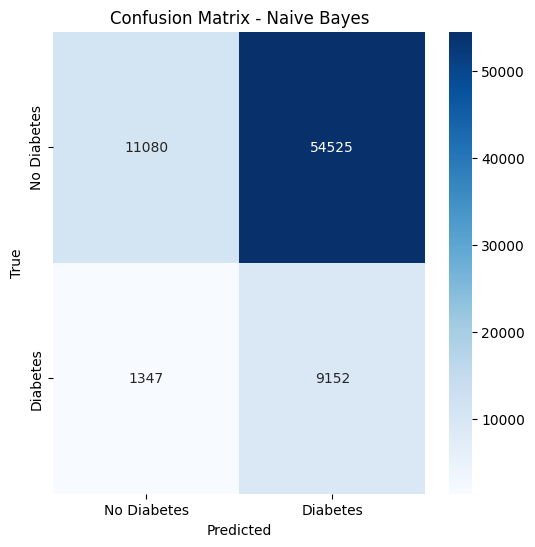

In [17]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train_selected, y_train_resampled)

# Predictions
y_pred_nb = nb_model.predict(X_test_selected)

# Accuracy
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {nb_accuracy}")

# Confusion Matrix
nb_cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6, 6))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


7. Gradient Boosting Classifier

Gradient Boosting Accuracy: 0.6027409860191317


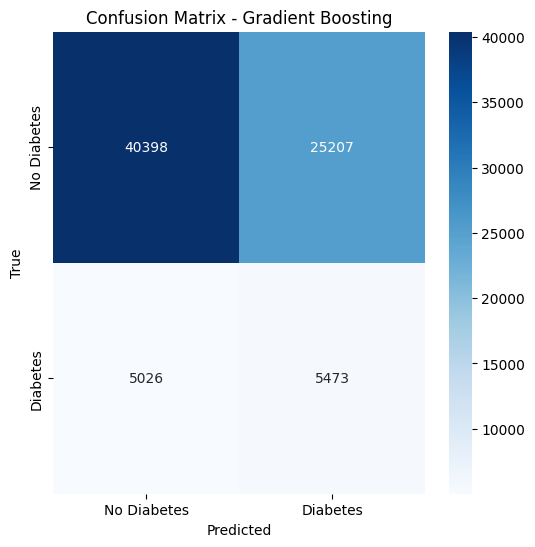

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train_selected, y_train_resampled)

# Predictions
y_pred_gb = gb_model.predict(X_test_selected)

# Accuracy
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {gb_accuracy}")

# Confusion Matrix
gb_cm = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(6, 6))
sns.heatmap(gb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


8. AdaBoost Classifier

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.5958293913591927


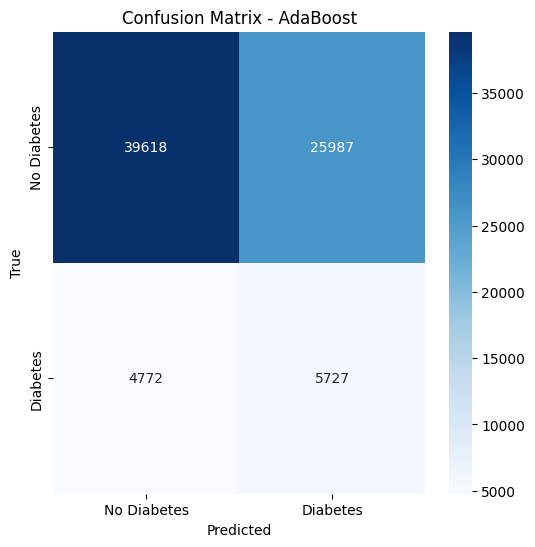

In [19]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoost model
ab_model = AdaBoostClassifier(random_state=42)

# Train the model
ab_model.fit(X_train_selected, y_train_resampled)

# Predictions
y_pred_ab = ab_model.predict(X_test_selected)

# Accuracy
ab_accuracy = accuracy_score(y_test, y_pred_ab)
print(f"AdaBoost Accuracy: {ab_accuracy}")

# Confusion Matrix
ab_cm = confusion_matrix(y_test, y_pred_ab)
plt.figure(figsize=(6, 6))
sns.heatmap(ab_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title("Confusion Matrix - AdaBoost")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


9. XGBoost Classifier

XGBoost Accuracy: 0.6027409860191317


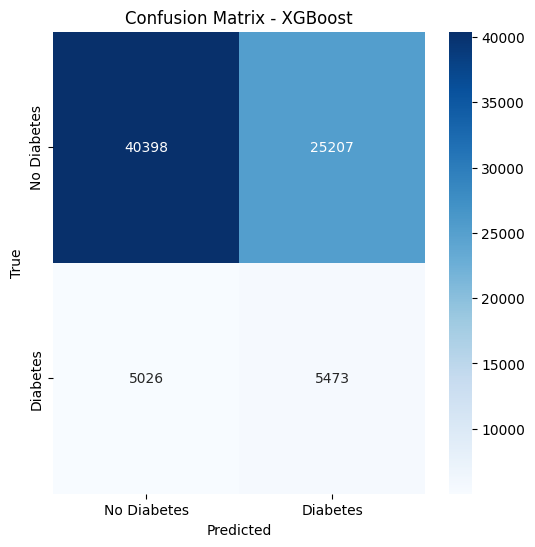

In [20]:
import xgboost as xgb

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train_selected, y_train_resampled)

# Predictions
y_pred_xgb = xgb_model.predict(X_test_selected)

# Accuracy
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {xgb_accuracy}")

# Confusion Matrix
xgb_cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 6))
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title("Confusion Matrix - XGBoost")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


10. Multi-Layer Perceptron (MLP)

MLP Accuracy: 0.6027409860191317


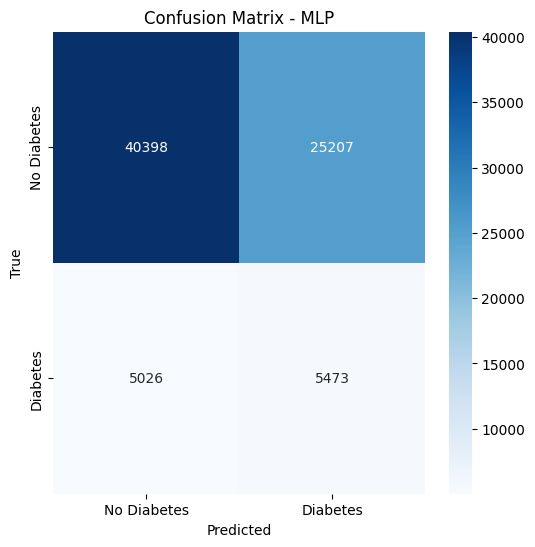

In [21]:
from sklearn.neural_network import MLPClassifier

# Initialize the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=500, random_state=42)

# Train the model
mlp_model.fit(X_train_selected, y_train_resampled)

# Predictions
y_pred_mlp = mlp_model.predict(X_test_selected)

# Accuracy
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
print(f"MLP Accuracy: {mlp_accuracy}")

# Confusion Matrix
mlp_cm = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(6, 6))
sns.heatmap(mlp_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title("Confusion Matrix - MLP")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
